In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
data=pd.read_csv('/content/housing.csv')

EDA- Exploratory Data Analysis

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()#there are 20640 instances and total_bedrooms has only 20433 non-null values values are missing here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [7]:
#Handling missing values
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


<ipython-input-8-80d62ba9cbb6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_bedrooms'])


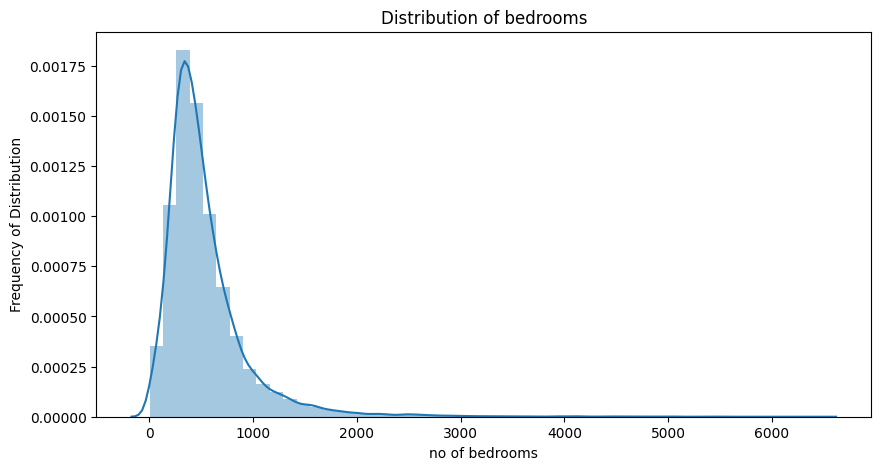

In [8]:
#Distribution of Total bedrooms
plt.figure(figsize=(10,5))
sns.distplot(data['total_bedrooms'])
plt.title("Distribution of bedrooms")
plt.xlabel('no of bedrooms')
plt.ylabel('Frequency of Distribution')
plt.show()
#It shows Right skewness which means positively skewed, so I prefer median to fill those missing values

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

<ipython-input-9-1eb34d5f1263>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [10]:
print(data.isnull().sum()) #Now missing values are all filled

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<ipython-input-11-3d78edf77fea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['median_income'], color = 'green')


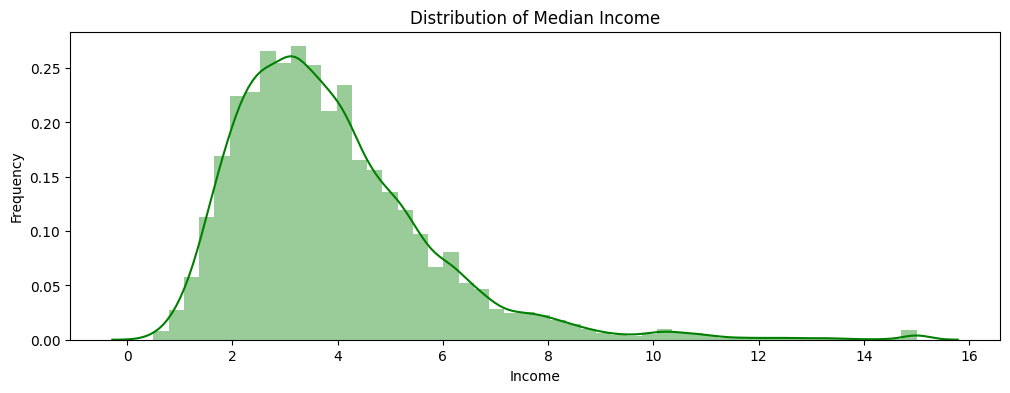

In [11]:
#Distribution of Median Income
plt.figure(figsize = (12,4))
sns.distplot(x = data['median_income'], color = 'green')
plt.title('Distribution of Median Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

positively skewed distribution.

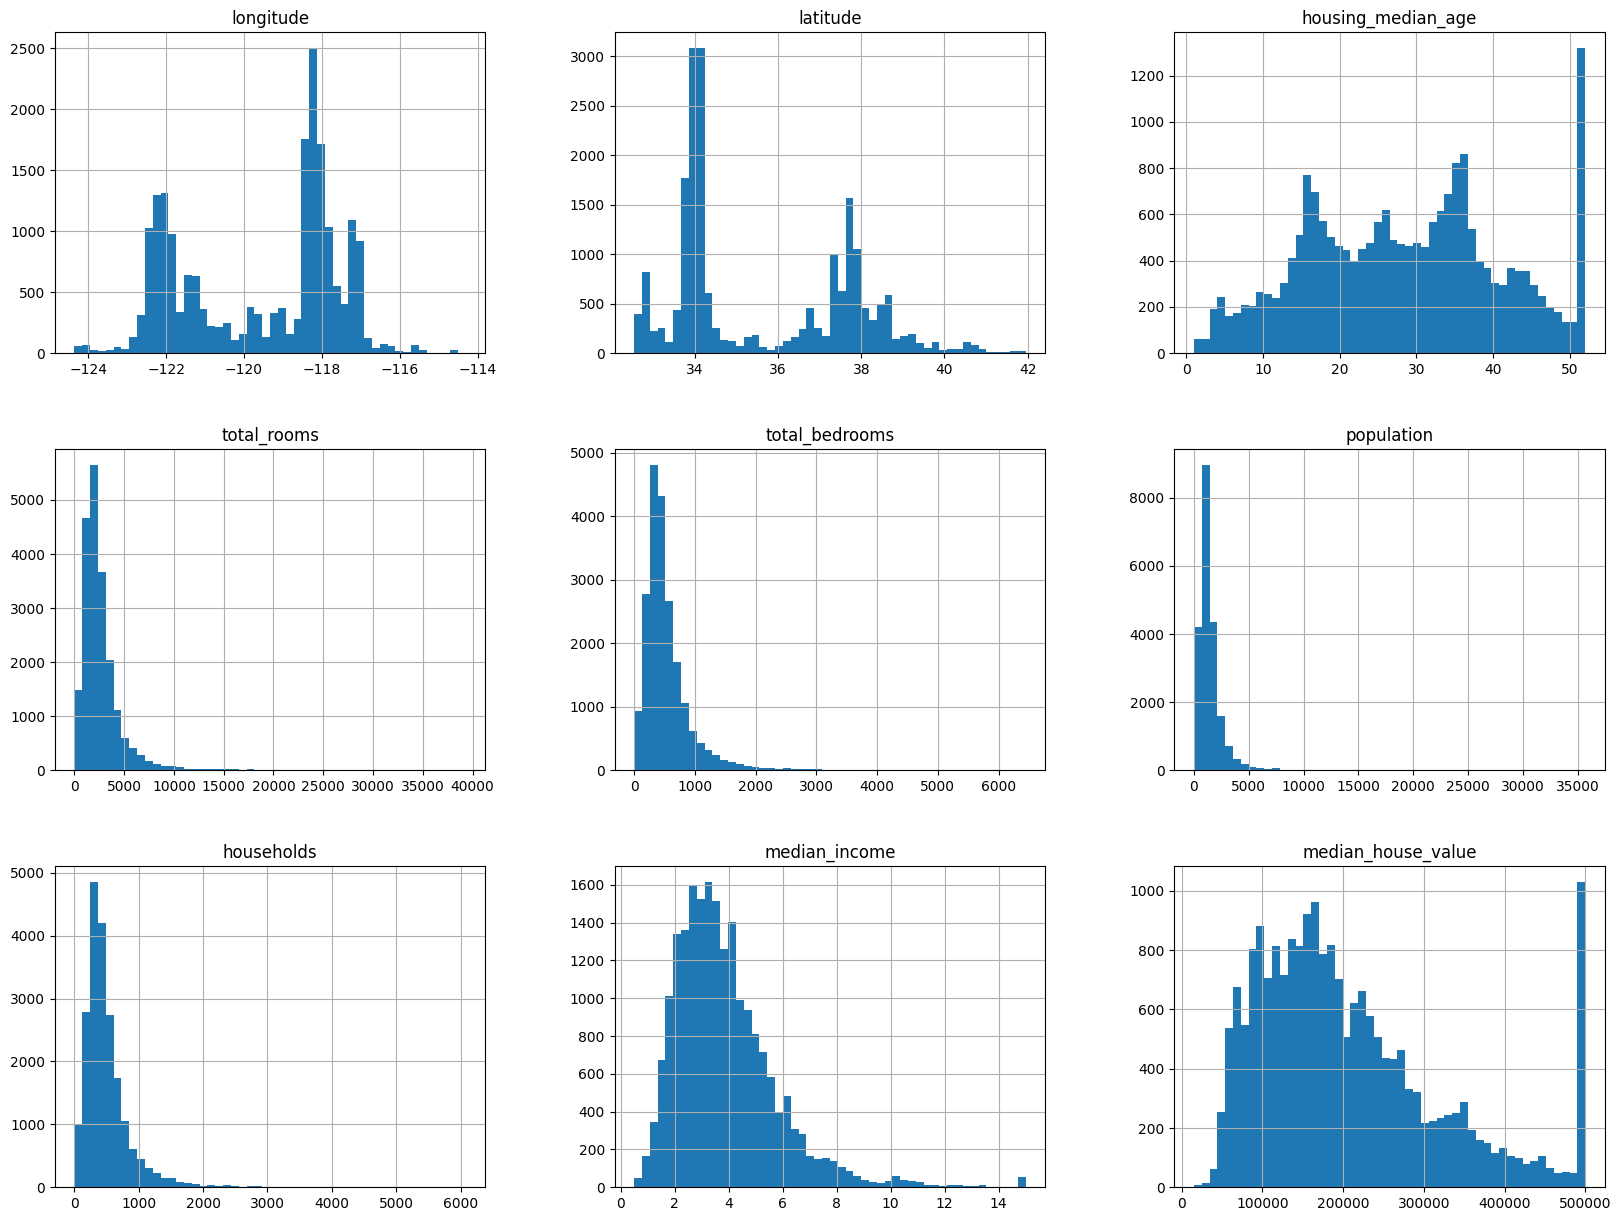

In [12]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

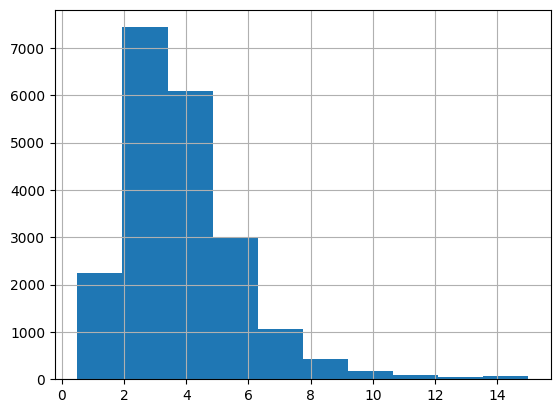

In [13]:
data['median_income'].hist()

<ipython-input-14-cac8ff53a200>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'ocean_proximity', y = 'population', data = data,palette = ['violet', 'teal', 'pink','lawngreen','lightcoral'])


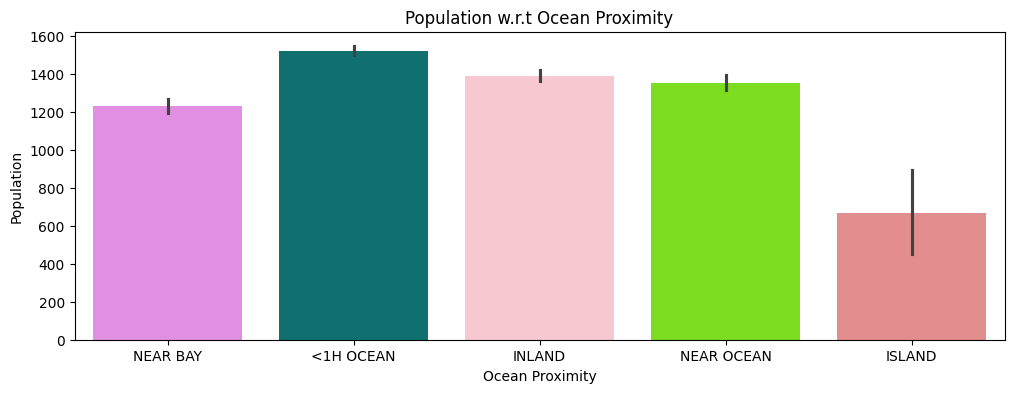

In [14]:
#--Population in California based on Ocean Proximity
plt.figure(figsize = (12,4))
sns.barplot(x = 'ocean_proximity', y = 'population', data = data,palette = ['violet', 'teal', 'pink','lawngreen','lightcoral'])
plt.title('Population w.r.t Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

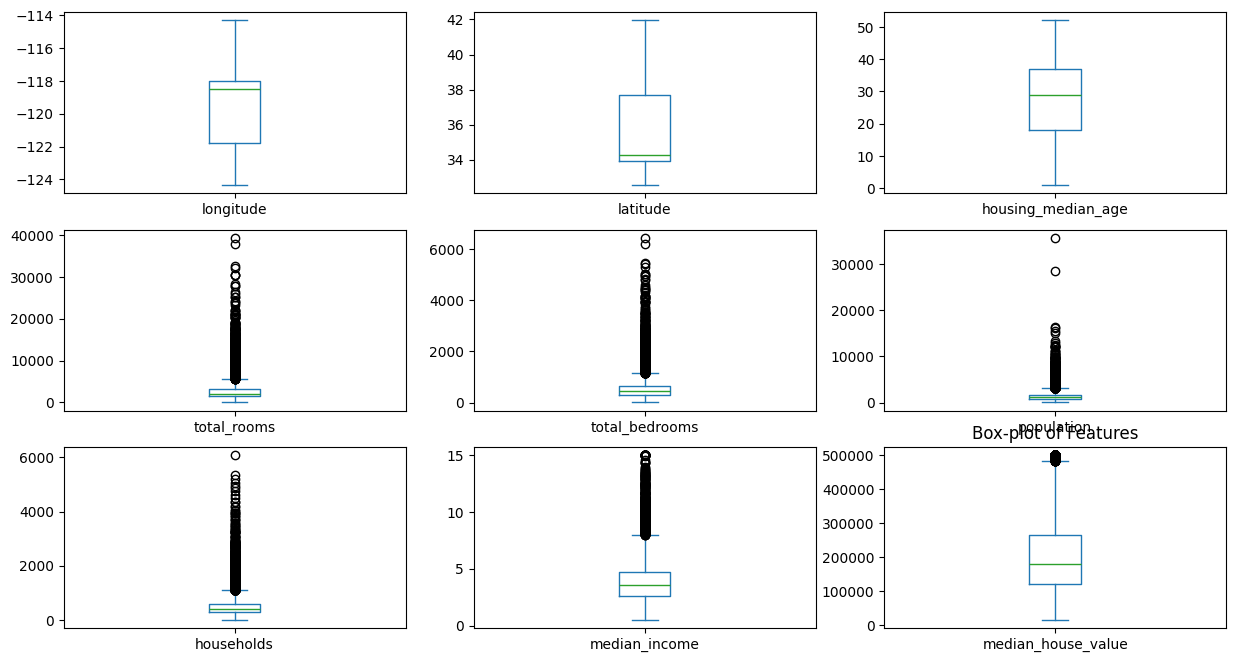

In [15]:
#--Boxplot of all the variables in dataset
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,8))
plt.title('Box-plot of Features')
plt.show()

Let us create a new column using 'housing_median_age' where any house greater than 30 is old indicated by 0 and less than 30 is new indicated by 1. I've created this column to be used in plots.

In [16]:
#--Creating a new column for EDA
data['house_age'] = [1 if x < 30 else 0 for x in data['housing_median_age']]

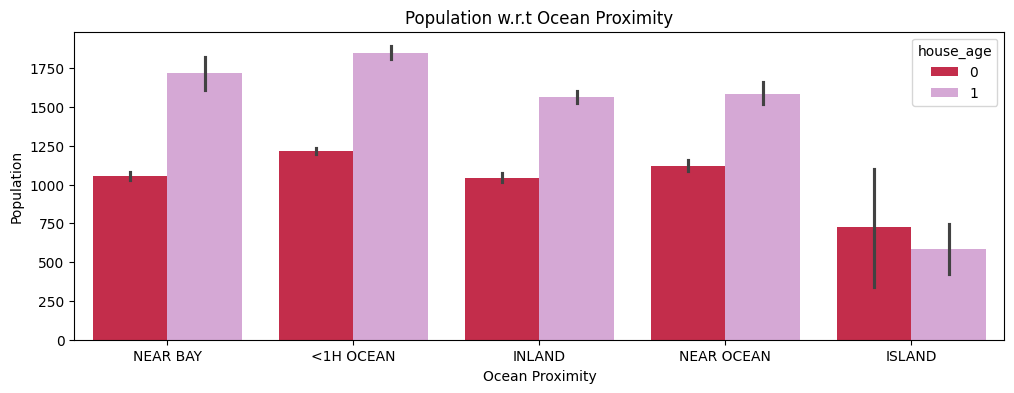

In [17]:
#--Population distribution based on house age
plt.figure(figsize = (12,4))
color = ['crimson', 'plum']
sns.barplot(x = 'ocean_proximity', y = 'population', data = data, hue = 'house_age', palette = color)
plt.title('Population w.r.t Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

<Figure size 1000x700 with 0 Axes>

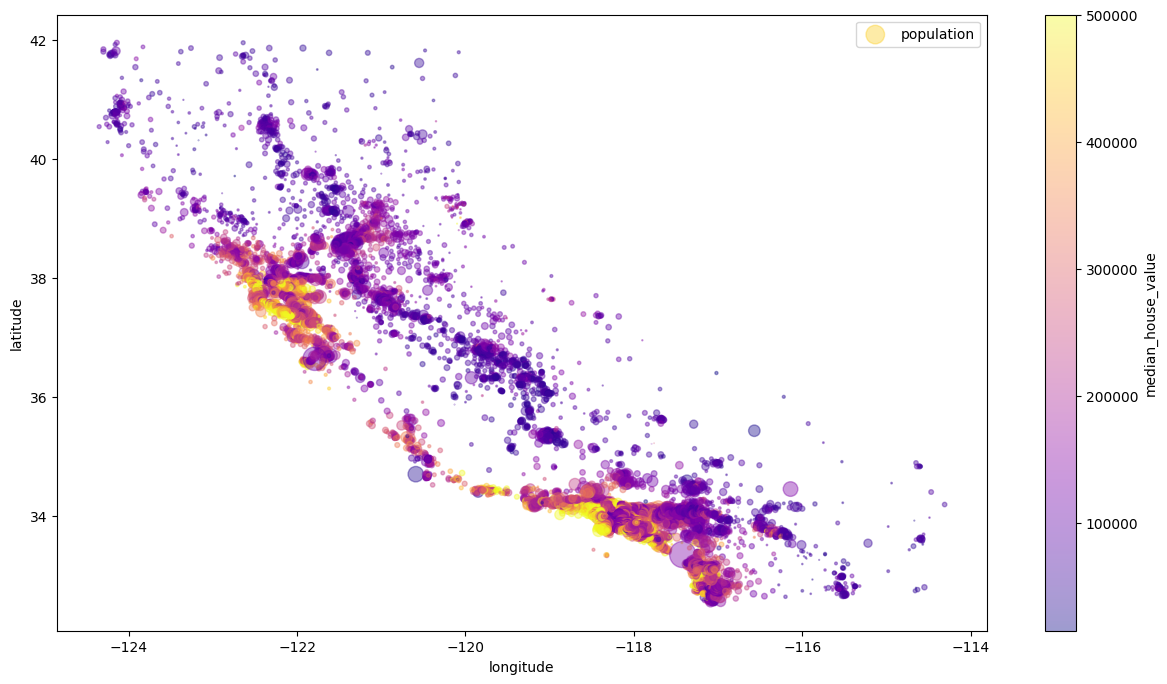

In [18]:
#--Population based on location
plt.figure(figsize=(10,7));
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap='plasma',colorbar=True,
    );
plt.legend();

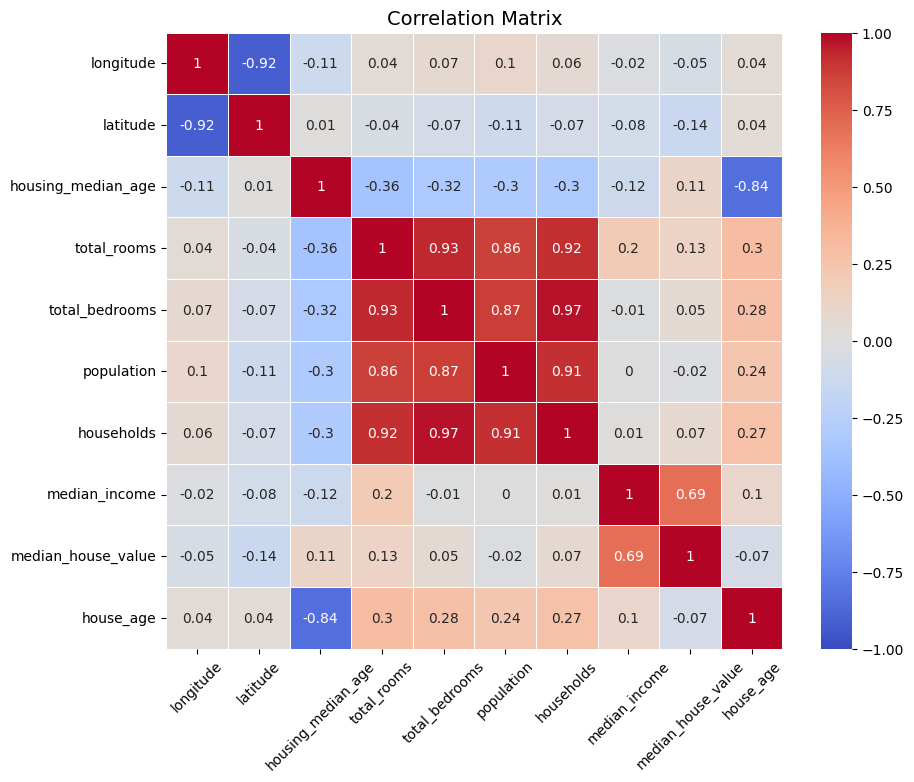

In [19]:
#--Correlation Matrix
def corrMat(data, figsize=(10, 8), cmap='coolwarm', annot=True, save_path=None):
    numeric_data = data.select_dtypes(include=['number'])
    corr_mat = numeric_data.corr().round(2)

    plt.figure(figsize=figsize)
    sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0,
                cmap=cmap, square=True, linewidths=0.5, annot=annot, cbar=True)

    plt.title("Correlation Matrix", fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)



    plt.show()
corrMat(data)


In [20]:
#--Encoding Categorical Variable
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = pd.DataFrame(encoder.fit_transform(
    data[['ocean_proximity']]).toarray())

final_data = data.join(encoded_data)

final_data.rename(columns = {0:'Ocean',1:'Inland',2:'Island',3:'Near Bay',4:'Near Ocean'}, inplace = True)
final_data.reset_index(inplace = True)

In [21]:
final_data.drop(columns = {'index'}, inplace = True)
final_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age,Ocean,Inland,Island,Near Bay,Near Ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0


Model Training

In [22]:
#--Train and Test dataset
x = final_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'Ocean', 'Inland',
       'Island', 'Near Bay', 'Near Ocean']]
y = final_data[['median_house_value']]

In [23]:
print(x.isnull().sum())  # Should be all zeros
print(y.isnull().sum())  # Should be all zeros


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
Ocean                 0
Inland                0
Island                0
Near Bay              0
Near Ocean            0
dtype: int64
median_house_value    0
dtype: int64


In [25]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [26]:
#Here we are dealing with Regression model. There are various type sof Regression models. e.g., Linear Regression, Decision Tree, Random Forest, XGBoost. We can build all the regression model and choose the best regression model according to the performance.

Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression().fit(x_train,y_train)

we'll be using GridSearch to find the best model among Decision Trees, Random Forest,Lasso and Ridge Regression by tuning the parameters and finding the best paramter value.

In [28]:
#Importing gridsearchcv for best model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [29]:
def best_model_selection(x, y):
    models = {
        'Decision Tree Regression': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', None]}
        },
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 10.0]}
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
        },
        'Random Forest Regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 30]}
        },
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=0)

    for model_name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)  # ✅ Corrected variable name

        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
best_model_selection(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.807e+12, tolerance: 1.335e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.878e+12, tolerance: 1.358e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+12, tolerance: 1.346e

,model,best_score,best_params
0,Decision Tree Regression,0.710426,"{'max_depth': 10, 'max_features': None, 'min_s..."
1,Ridge Regression,0.645865,{'alpha': 1.0}
2,Lasso Regression,0.645794,{'alpha': 10.0}
3,Random Forest Regressor,0.801683,{'n_estimators': 30}


In [30]:
#--Building all the best models
best_linear = LinearRegression().fit(x_train, y_train)
best_lasso = Lasso(alpha = 1).fit(x_train, y_train)
best_ridge = Ridge(alpha = 10).fit(x_train, y_train)
best_dc = DecisionTreeRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 4,min_samples_split = 10).fit(x_train, y_train)
best_rfr = RandomForestRegressor(n_estimators = 30).fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.541e+12, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [31]:
#--Y_pred for all the models
y_pred_linear = best_linear.predict(x_test)
y_pred_lasso = best_lasso.predict(x_test)
y_pred_ridge = best_ridge.predict(x_test)
y_pred_dc = best_dc.predict(x_test)
y_pred_rfr = best_rfr.predict(x_test)

In [32]:
# evaluate the performance of our models using Mae, Mse and R2 score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [33]:
#--Mean Absolute Error
mae_linear = mae(y_test,y_pred_linear)
mae_lasso = mae(y_test,y_pred_lasso)
mae_ridge = mae(y_test,y_pred_ridge)
mae_dc = mae(y_test,y_pred_dc)
mae_rfr = mae(y_test,y_pred_rfr)

In [34]:
#--Mean Squared Error
mse_linear = mse(y_test,y_pred_linear)
mse_lasso = mse(y_test,y_pred_lasso)
mse_ridge = mse(y_test,y_pred_ridge)
mse_dc = mse(y_test,y_pred_dc)
mse_rfr = mse(y_test,y_pred_rfr)

In [36]:
#--Coefficient of determination
r2_linear = r2_score(y_test,y_pred_linear)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
r2_dc = r2_score(y_test,y_pred_dc)
r2_rfr = r2_score(y_test,y_pred_rfr)

In [37]:
#--Evaluation Metrics data
eval_data = pd.DataFrame({'MAE':[mae_linear,mae_lasso,mae_ridge,mae_dc,mae_rfr],
                        'MSE':[mse_linear,mse_lasso,mse_ridge,mse_dc,mse_rfr],
                       'R2 Score' : [r2_linear,r2_lasso,r2_ridge,r2_dc,r2_rfr],
                    'Model': ['Linear Regression','Lasso Regression','Ridge Regression','Decision Trees','Random Forest']})
eval_data.head()

,MAE,MSE,R2 Score,Model
0,50078.098842,4.733529e+09,0.639361,Linear Regression
1,50079.193513,4.733672e+09,0.639350,Lasso Regression
2,50104.233599,4.738304e+09,0.638997,Ridge Regression
3,49674.242900,5.037853e+09,0.616175,Decision Trees
4,32304.411768,2.443153e+09,0.813861,Random Forest


Based on the evaluation df we can see that Random Forest outperforms rest of the models with 81% of variation exaplained and has the lower MAE and MSE score as desired for a good model.

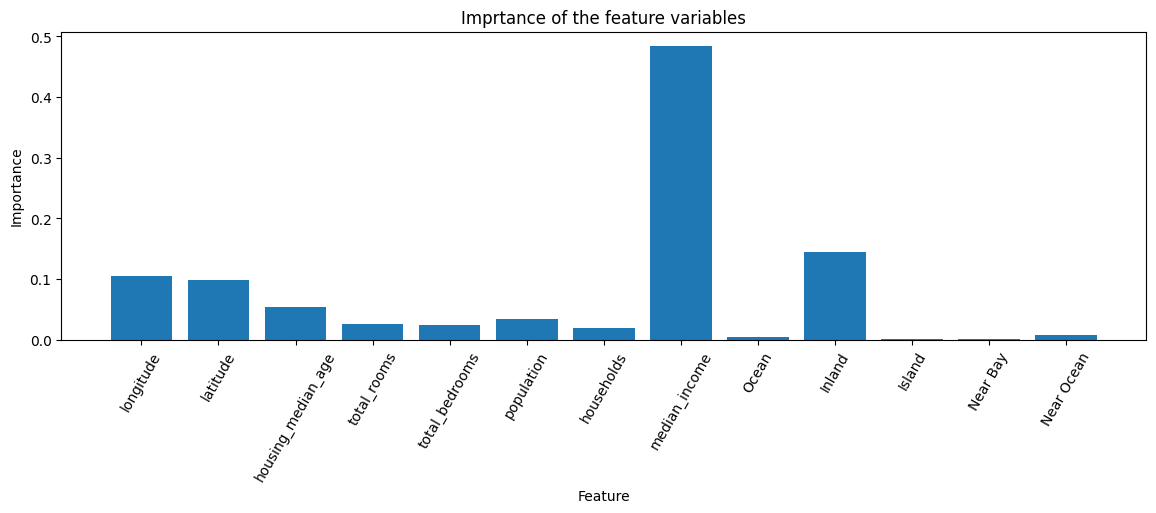

In [39]:
#--Visulaizing coefficients of Random Forest
plt.figure(figsize = (14,4))
plt.bar(x.columns, best_rfr.feature_importances_)
plt.title('Imprtance of the feature variables')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation = 60)
plt.show()

In [41]:
import pickle

# Save the model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rfr, file)


In [42]:
#loading pickle file
with open("random_forest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [43]:
#download pickle file
from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>